In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import random
import cv2
import numpy as np
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import pandas as pd

In [2]:
#Loading images
def image_canny(path):
    np.random.seed(42)
    random.seed(42)         

    images = os.listdir(path)
    train_images = []
    canny_output = []
    for image in images[0:5]:
            img = Image.open(path+"/"+image)
            img = ImageOps.grayscale(img)

            img_arr = np.array(img)
            train_images.append(img_arr)
            edge_detected_image = cv2.Canny(img_arr, 210, 50)
            canny_output.extend(edge_detected_image[:-1,:-1].flatten()) 
            

            theta = np.random.randint(1, 360)
            img_rot = img.rotate(theta)
            edge_rotated_image = np.array(Image.fromarray(edge_detected_image).rotate(theta))
            canny_output.extend(edge_rotated_image[:-1,:-1].flatten())
            train_images.append(np.array(img_rot))


            s = np.random.randint(1, 4)
            x = s*(np.array(img).shape[0])
            y = s*(np.array(img).shape[1])
            img_sc = img.resize((x,y))
            edge_rescaled_image = np.array(Image.fromarray(edge_detected_image).resize((x, y)))
            canny_output.extend(edge_rescaled_image[:-1,:-1].flatten())
            train_images.append(np.array(img_sc))


            enhancer = ImageEnhance.Brightness(img)
            img_br = enhancer.enhance(random.random()*3)
            canny_output.extend(edge_detected_image[:-1,:-1].flatten())
            train_images.append(np.array(img_br))

    return train_images, canny_output

In [3]:
def feature_extraction(train_images):
    features = []
    for image in train_images:
        print(image.shape)
        r, c = image.shape 
        for i in range(r-1):
            for j in range(c-1):
                d_list = []
                d_list.append(image[i, j+1]-image[i, j])
                d_list.append(image[i+1, j]-image[i, j])
                d_list.append(image[i+1, j+1]-image[i, j])
                features.append(d_list)
    return features

In [4]:
train_images, canny_output = image_canny("./images/train_")
train_df = pd.DataFrame(data=feature_extraction(train_images), columns =["dx", "dy", "dz"])
train_df['Canny'] = [i/255 for i in canny_output]
train_df

(321, 481)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(1443, 963)
(321, 481)
(481, 321)
(481, 321)
(321, 481)
(481, 321)
(481, 321)
(481, 321)
(963, 1443)
(481, 321)
(321, 481)
(321, 481)
(1443, 963)
(321, 481)


,dx,dy,dz,Canny
0,253,40,28,0.0
1,8,31,18,0.0
2,47,10,252,0.0
3,2,205,214,0.0
4,234,212,209,1.0
...,...,...,...,...
6772807,216,251,220,0.0
6772808,0,4,6,0.0
6772809,254,6,249,0.0
6772810,249,251,244,0.0


In [6]:
validation_images, canny_out_val = image_canny("./images/val_")
val_df = pd.DataFrame(data=feature_extraction(validation_images), columns=["dx", "dy", "dz"])
val_df['Canny'] = [i/255 for i in canny_out_val]
val_df.head()

(321, 481)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(1443, 963)
(321, 481)
(321, 481)
(321, 481)
(481, 321)
(321, 481)
(321, 481)
(321, 481)
(1443, 963)
(321, 481)
(321, 481)
(321, 481)
(1443, 963)
(321, 481)


,dx,dy,dz,Canny
0,233,219,168,0.0
1,251,191,205,0.0
2,8,210,218,0.0
3,252,210,220,0.0
4,252,224,251,0.0


In [7]:
X_train = train_df.iloc[:10000, :3]
Y_train = train_df.iloc[:10000, -1]
X_val = val_df.iloc[:, :3]
Y_val = val_df.iloc[:, -1]

In [8]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [9]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[3]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid'),
])


In [10]:
model.compile(loss="mse",
              optimizer="adam",
             metrics=["accuracy"])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=1000,
    epochs=10,
    verbose=0, 
    callbacks=[callback]# suppress output since we'll plot the curves
)
history

In [16]:
def feature_extracter(img):
    features_list = []
    r, c = img.shape
    for i in range(r-1):
        for j in range(c-1):
            d_list = []
            d_list.append(img[i, j+1]-img[i, j])
            d_list.append(img[i+1, j]-img[i, j])
            d_list.append(img[i+1, j+1]-img[i, j])
            features_list.append(d_list)
    return features_list

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


4800/4800 [==============================] - 25s 4ms/step
[[66.31763  41.66423  68.09416  ... 67.40608  54.237766 66.22427 ]
 [66.343956 44.268944 67.69314  ... 60.85206  66.645996 66.343956]
 [61.409836 45.146782 44.597897 ... 68.29038  68.03424  67.32192 ]
 ...
 [61.498657 61.35426  61.258636 ... 55.374836 69.494225 69.25607 ]
 [70.40489  70.40489  70.40489  ... 61.11463  60.86872  60.86872 ]
 [75.349266 75.17951  74.35972  ... 61.012306 61.107685 61.107685]]


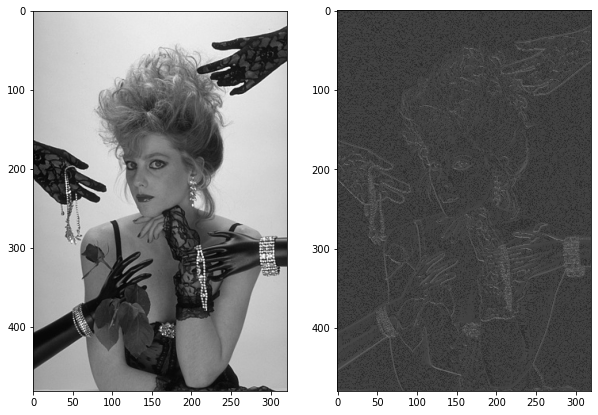

In [59]:
img1 = Image.open("./images/test_/198087.jpg")
# img2 = Image.open("./images/test_/5096.jpg")
img1 = ImageOps.grayscale(img1)
# img2 = ImageOps.grayscale(img2)

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
#img.show()
img1 = np.array(img1)

r, c = img1.shape
fl = np.array(feature_extracter(img1))
predictions = model.predict(fl)

predictions = predictions.reshape((r-1, c-1)) * 255
pred = Image.fromarray(predictions)
print(predictions)
plt.subplot(122)
plt.imshow(pred, cmap='gray')
#pred.show()

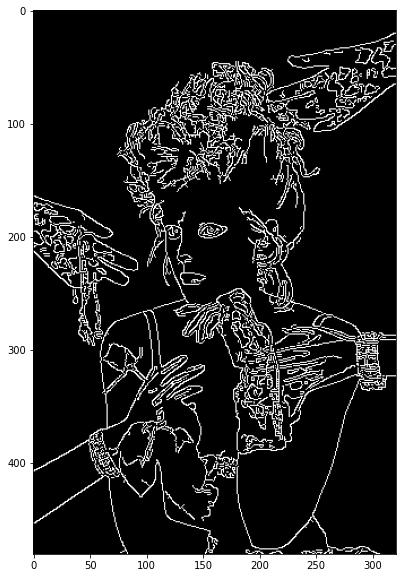

In [61]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.Canny(img1, 210, 50), cmap='gray')

In [4]:
def feature_extractor(img):
    features_list = []
    r, c = img.shape
    for i in range(r-1):
        for j in range(c-1):
            d_list = []
            d_list.append(img[i, j+1]-img[i, j])
            d_list.append(img[i+1, j]-img[i, j])
            d_list.append(img[i+1, j+1]-img[i, j])
            features_list.append(d_list)
    return features_list

def predictor(img):
    import numpy as np
    from tensorflow.keras.models import load_model
    from PIL import ImageOps
    img = ImageOps.grayscale(img)
    img = np.array(img)
    r, c = img.shape
    savedModel = load_model("./edge detector.h5")
    predictions = savedModel.predict(np.array(feature_extractor(img)))
    predictions = predictions.reshape((r-1, c-1)) * 255
    predictions[predictions>72] = 255
    predictions[predictions<72] = 0
    return Image.fromarray(predictions)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':


4800/4800 [==============================] - 16s 3ms/step


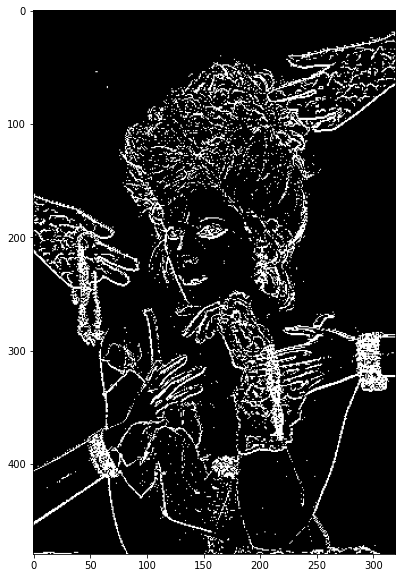

In [6]:
from PIL import Image
im = predictor(Image.open("./images/test_/198087.jpg"))
plt.figure(figsize=(10, 10))
plt.imshow(im)

In [ ]:
def canny(img):
    import numpy as np
    from PIL import Image
    import cv2
    img = np.array(img)
    img_canny = cv2.Canny(img,100,200)
    return Image.fromarray(img_canny)

def sobel(img):
    import numpy as np
    img = np.array(img)
    import cv2
    img_gaussian = cv2.GaussianBlur(img,(3,3),0)
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
    img_sobel = img_sobelx + img_sobely
    return Image.fromarray(img_sobel)

def prewitt(img):
    import numpy as np
    import cv2
    img = np.array(img)
    img_gaussian = cv2.GaussianBlur(img,(3,3),0)
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt = img_prewittx+img_prewitty
    return Image.fromarray(img_prewitt)

In [39]:
from PIL import Image, ImageOps
img = Image.open("./images/test_/OIP.jpeg")
img = ImageOps.grayscale(img)
img1, img2, img3 = canny(img), sobel(img), prewitt(img)
img3.show("Canny")
